# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [6]:
# Import the titanic dataset here

import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [18]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger"
})

# Replace all missing values by "crew"
df_titanic["type"].fillna("crew", inplace=True)

df_passengers = df_titanic[df_titanic['type']=="passenger"]

joint_embarked_class = pd.crosstab(
    df_passengers["embarked"],
    df_passengers["class"],
    normalize=True
)

joint_embarked_class

class,1st,2nd,3rd
embarked,,,
B,0.002278,0.004556,0.000000
C,0.108580,0.019742,0.077449
Q,0.002278,0.005315,0.085801
S,0.132878,0.186029,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [25]:
# Cond. Dist. of Class Given Embarked

class_given_embarked = joint_embarked_class.divide(
    joint_embarked_class.sum(axis=1),
    axis=0
)

class_given_embarked

class,1st,2nd,3rd
embarked,,,
B,0.333333,0.666667,0.000000
C,0.527675,0.095941,0.376384
Q,0.024390,0.056911,0.918699
S,0.191466,0.268053,0.540481


P(3rd class| Southampton) = 54.05%

In [24]:
# Cond. Dist. of Embarked Given Class

embarked_given_class = joint_embarked_class.divide(
    joint_embarked_class.sum(axis=0),
    axis=1
)

embarked_given_class

class,1st,2nd,3rd
embarked,,,
B,0.009259,0.021127,0.000000
C,0.441358,0.091549,0.143865
Q,0.009259,0.024648,0.159379
S,0.540123,0.862676,0.696756


P(Southampton | 3rd class) = 69.68%

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

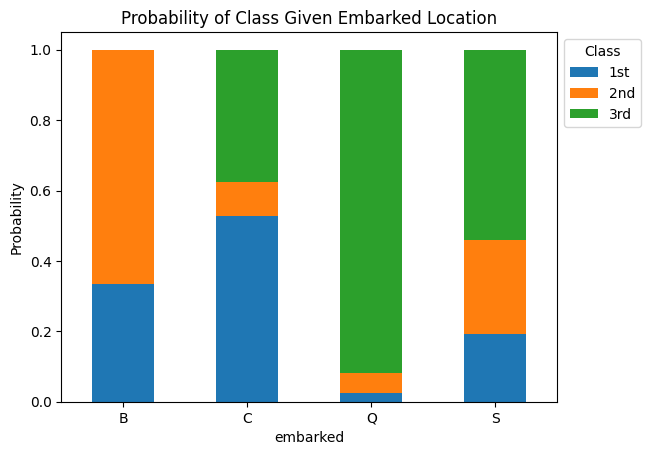

In [30]:
from matplotlib import pyplot as plt # For plots

class_given_embarked.plot.bar(stacked=True)
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Probability of Class Given Embarked Location")
plt.ylabel("Probability")
plt.legend(bbox_to_anchor=(1.0, 1.0), title = "Class") # Moving Legend to Outside Plot

**The pros of using this visualization versus the conditional and joint distribution calculated before are:**
-  You get a visual representation, so it's easier to see what's going on, and this is especially the case with a stacked bar plot where the probabilities add up to 1 for each embark location.

**The cons are:**
- You can only eyeball probabilities, so it's harder to extract exact numbers just from the plot. This is especially the case with smaller probabilities.